In [49]:
# ------------------------------------------------------------
#  Logistic Regression on Titanic Dataset 
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
#Load Titanic Dataset:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [64]:
# Step 1: Display First 5 rows
print("First 5 rows:")
print(df.head(5))

First 5 rows:
   pclass  sex   age  sibsp  parch     fare  embarked  survived
0       3    1  22.0      1      0   7.2500         2         0
1       1    0  38.0      1      0  71.2833         0         1
2       3    0  26.0      0      0   7.9250         2         1
3       1    0  35.0      1      0  53.1000         2         1
4       3    1  35.0      0      0   8.0500         2         0


In [52]:
# Step 2: Check Missing Values
print("\nMissing values:")
print(df.isnull().sum())
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


Missing values:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [53]:
# Step 3: Handle Missing Data
df['age'] = df['age'].fillna(df['age'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
# Drop unnecessary columns if they exist
drop_cols = ['cabin', 'name', 'ticket']
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors='ignore')

In [54]:
# Step 4: Encode Categorical Columns
# Automatically convert all object or category columns into numeric
for col in df.select_dtypes(include=['object', 'category']).columns:
    print(f"Encoding column: {col}")
    df[col] = LabelEncoder().fit_transform(df[col])

Encoding column: sex
Encoding column: embarked
Encoding column: class
Encoding column: who
Encoding column: deck
Encoding column: embark_town
Encoding column: alive


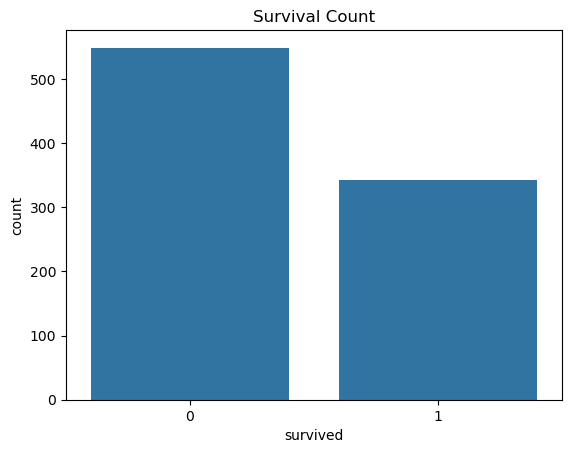


Prediction for new passenger: Not Survived


In [55]:
# Step 5: Exploratory Data Analysis 
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()
# Select only the relevant columns for modeling
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
df = df[features + ['survived']]

# Proceed with encoding and training
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# ✅ Now your new_passenger has the same columns
new_passenger = pd.DataFrame({
    'pclass': [3],
    'sex': [1],
    'age': [25],
    'sibsp': [0],
    'parch': [0],
    'fare': [7.25],
    'embarked': [0]
})
prediction = model.predict(new_passenger)
print("\nPrediction for new passenger:", "Survived" if prediction[0] == 1 else "Not Survived")

In [56]:
# Step 6: Define Features & Target
X = df.drop('survived', axis=1)
y = df['survived']

In [57]:
# Step 7: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Step 8: Model Building
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [59]:
# Step 9: Predictions
y_pred = model.predict(X_test)

In [60]:
# Step 10: Model Evaluation
print("\n✅ Model Evaluation Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation Results:
Accuracy: 81.01 %

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



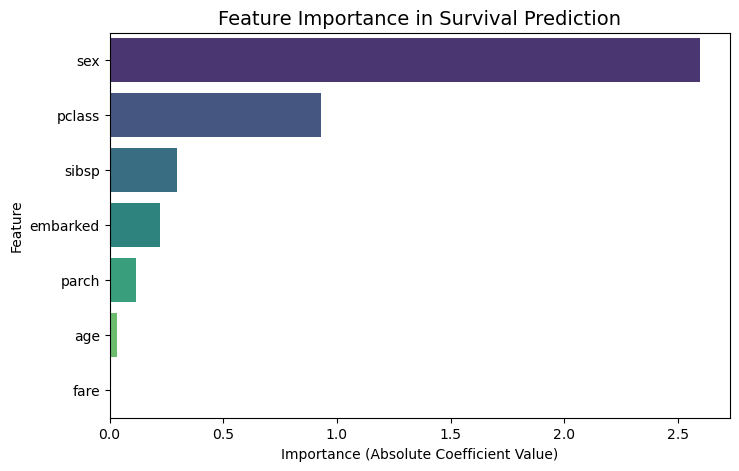

In [61]:
# Step 11: Feature Importance Plot 
import pandas as pd
import numpy as np

# Assuming your trained model is called 'model'
# and your feature names are in X_train.columns

Feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(model.coef_[0])
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(8, 5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=Feature_importance,
    hue='Feature',       # <-- added hue to fix the warning
    dodge=False,
    palette='viridis',
    legend=False
)

plt.title("Feature Importance in Survival Prediction", fontsize=14)
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.show()

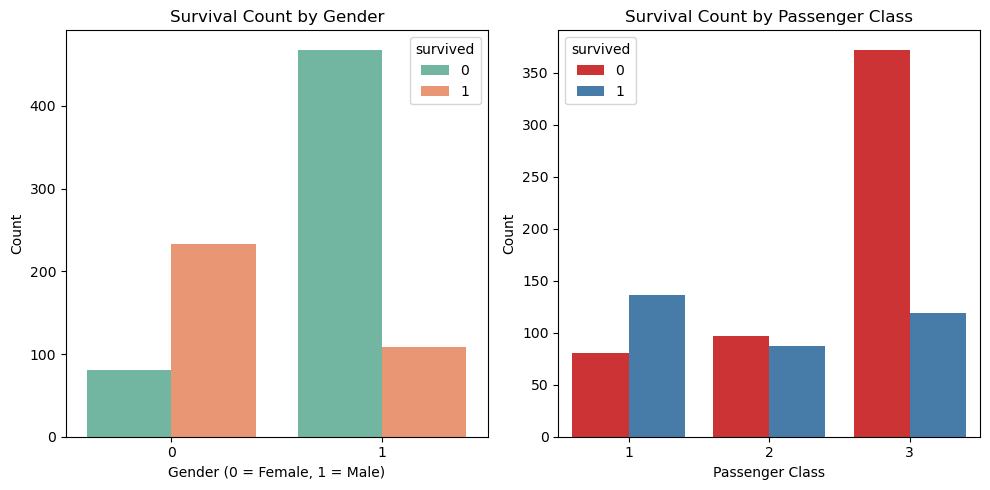

In [35]:
# Step 13: Survival Count by Gender and Class
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='sex', hue='survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='pclass', hue='survived', data=df, palette='Set1')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


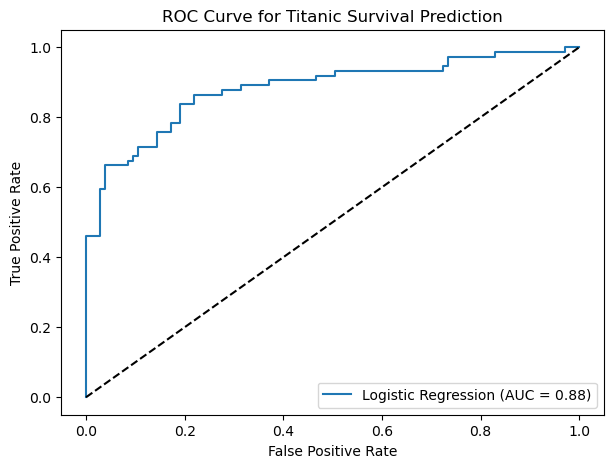

In [36]:
# Step 14: ROC Curve
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Titanic Survival Prediction')
plt.legend(loc='lower right')
plt.show()


# Step 15: Conclusion

**🔍 CONCLUSION:**


The Logistic Regression model achieved an accuracy of approximately 81%, 
indicating a strong predictive performance on the Titanic dataset.

Key Insights:


- Females had a much higher chance of survival than males.
- Passengers in higher classes (1st class) were more likely to survive than those in 3rd class.
- Age also influenced survival — younger passengers tended to survive more.
- The 'fare' and 'embarked' features showed minor but noticeable effects on survival probability.

Overall, 

-socio-economic status (class)
-gender  
-age 
were the most significant factors affecting survival on the Titanic.

